In [1]:
API = "api-fxpractice.oanda.com/"
STREAM_API = "stream-fxpractice.oanda.com/"

In [2]:
%matplotlib inline
import requests
import json
import pandas as pd
from json.decoder import JSONDecodeError
import mplfinance as mpf
import time

In [3]:
class create:
    
    def __init__(self, instrument, ltp):
        self.instrument = instrument
        self.ltp = ltp
        
        dictionary = {
            instrument : ltp
        }
        
        with open("ltp.json", 'r+') as file:
            try:  
                old_data = json.load(file)
                old_data.update(dictionary)
                json.dump(old_data,file)
            except JSONDecodeError:
                json.dump(dictionary, file)

In [4]:
def json_to_pandas(json):
    data = response.json()
    price_json = data["candles"]
    times,close_price,high_price,low_price,open_price =[], [], [], [], []

    for candle in price_json:
        d = candle["time"]
        d = d[:10]
        times.append(d)
        close_price.append(float(candle["mid"]["c"]))
        high_price.append(float(candle["mid"]["h"]))
        low_price.append(float(candle["mid"]["l"]))
        open_price.append(float(candle["mid"]["o"]))

    #dates,opens,highs,lows,closes
    df = pd.DataFrame({'Date':times, "Open":open_price, "High": high_price, "Low": low_price, "Close":close_price})
    df['Date']  =pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    
    
    
    return df
        

In [5]:
pricingPath = "v3/accounts/ENTER ACCOUNT ID/pricing"


In [6]:
#Europe/US

query = {"instruments": "EUR_USD"}
headers = {"Authorization": "Bearer " +  "ENTER OANDA API KEY"}

In [7]:
response = requests.get("https://"+API+pricingPath, headers=headers,params=query)


In [8]:
response.json()

{'time': '2021-06-23T06:23:30.949532293Z',
 'prices': [{'type': 'PRICE',
   'time': '2021-06-23T06:23:28.683972930Z',
   'bids': [{'price': '1.19229', 'liquidity': 10000000}],
   'asks': [{'price': '1.19242', 'liquidity': 10000000}],
   'closeoutBid': '1.19229',
   'closeoutAsk': '1.19242',
   'status': 'tradeable',
   'tradeable': True,
   'unitsAvailable': {'default': {'long': '4193364', 'short': '4193364'},
    'openOnly': {'long': '4193364', 'short': '4193364'},
    'reduceFirst': {'long': '4193364', 'short': '4193364'},
    'reduceOnly': {'long': '0', 'short': '0'}},
   'quoteHomeConversionFactors': {'positiveUnits': '1.00000000',
    'negativeUnits': '1.00000000'},
   'instrument': 'EUR_USD'}]}

In [9]:
json_response = response.json()
instrument = json_response["prices"][0]["instrument"]
prices = json_response["prices"][0]["closeoutBid"]
prices = float(prices)
ltp1=create(instrument,prices)


In [10]:
#Creating Candlestick Chart for First Quarter

from_time = time.mktime(pd.to_datetime("01/01/2021").timetuple())
to_time = time.mktime(pd.to_datetime("04/02/2021").timetuple())

In [11]:
#1 Day Intervals
query = {"from":str(from_time), "to":str(to_time), "granularity":"D"}

In [12]:
candlesPath = "v3/accounts/ENTER ACCOUNT ID/instruments/"

In [13]:
response = requests.get("https://"+API+candlesPath+instrument+"/candles", headers=headers,params=query)

In [14]:
EURUSD_df = json_to_pandas(response)

In [15]:
EURUSD_df

,Open,High,Low,Close
Date,,,,
2020-12-30,1.22979,1.23094,1.22088,1.22156
2021-01-03,1.22400,1.23098,1.22303,1.22525
2021-01-04,1.22525,1.23057,1.22458,1.22986
2021-01-05,1.22986,1.23496,1.22656,1.23272
2021-01-06,1.23264,1.23446,1.22450,1.22692
...,...,...,...,...
2021-03-25,1.17650,1.18050,1.17650,1.17941
2021-03-28,1.17941,1.17948,1.17606,1.17650
2021-03-29,1.17640,1.17764,1.17114,1.17158


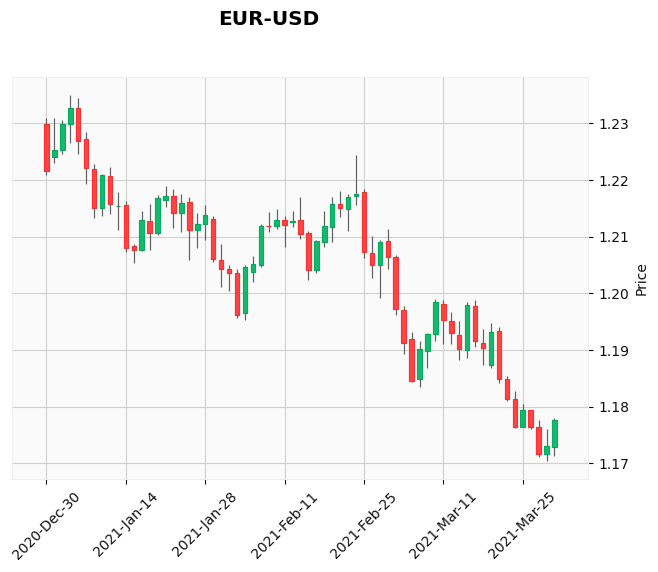

In [16]:
mpf.plot(EURUSD_df, type = 'candle', style= 'yahoo', title = 'EUR-USD', ylabel='Price')